In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os
import shutil

from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import History 

from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K
import os.path as osp

import tensorflow as tf
from tensorflow.python.tools import freeze_graph, optimize_for_inference_lib

print("tensorflow version:", tf.VERSION)
print("Done loading libraries!")

Using TensorFlow backend.


tensorflow version: 1.15.0
Done loading libraries!


In [2]:
print("loading data...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("done")

loading data...
done


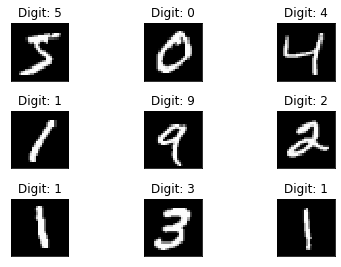

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

#for conv2d
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255.0
X_test /= 255.0

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)
print(np.unique(y_train, return_counts=True))

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable para

X_train shape (60000, 28, 28, 1)
y_train shape (60000,)
X_test shape (10000, 28, 28, 1)
y_test shape (10000,)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 67s - loss: 0.1500 - accuracy: 0.9542 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 2/5
 - 69s - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0339 - val_accuracy: 0.9891
Epoch 3/5
 - 66s - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 4/5
 - 65s - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 5/5
 - 66s - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0342 - val_accuracy: 0.9901
Saved trained model at results/keras_mnist.h5 


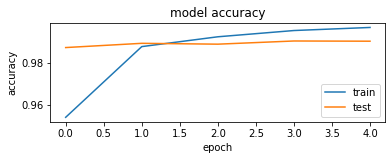

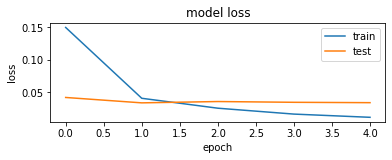

In [6]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

K.set_learning_phase(1)
epochs = 5
batch_size = 128

history = History()

history = model.fit(X_train, Y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks=[history])

# saving the model
save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
mnist_model = load_model("results/keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.03418102661548437
Test Accuracy 0.9901000261306763


(28, 28, 1)

9901  classified correctly
99  classified incorrectly


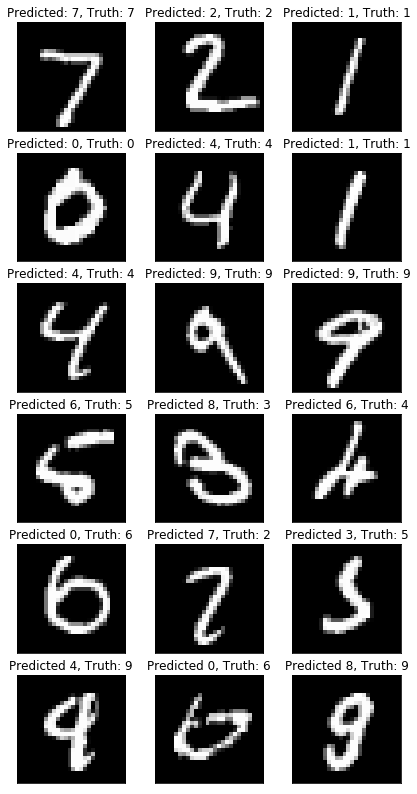

In [8]:
mnist_model = load_model("results/keras_mnist.h5")
print(X_test[0].shape)
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])


In [9]:
path_to_model = "results/keras_mnist.h5"
saved_model_path = "digits_nn"

model = load_model(path_to_model)
nb_classes = 1 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name = saved_model_path + '.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

output nodes names are:  ['output_node0']
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.
saved the constant graph (ready for inference) at:  tensorflow_model/digits_nn.pb


In [10]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()
print_graph_nodes("tensorflow_model/digits_nn.pb")


tensorflow_model/digits_nn.pb
=======================INPUT=========================
[name: "conv2d_1_input_3"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 28
      }
      dim {
        size: 28
      }
      dim {
        size: 1
      }
    }
  }
}
]
=======================OUTPUT========================
[name: "output_node0"
op: "Identity"
input: "strided_slice"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
]
===================KERAS_LEARNING=====================
[]



(28, 28)


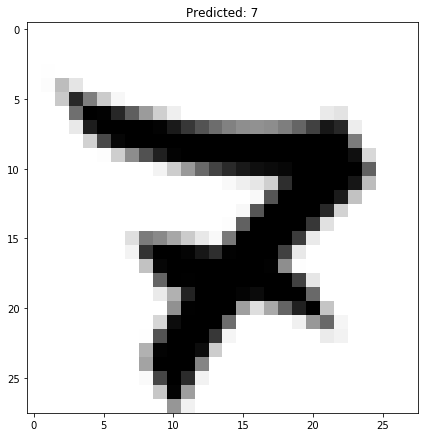

In [11]:
image = plt.imread('sieben_28x28.png')
print(image.shape)
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

plt.title("Predicted: {}".format(pred.argmax()))
plt.imshow(image, cmap='gray')